- https://python-graph-gallery.com/
- https://python-graph-gallery.com/323-directed-or-undirected-network/

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import networkx as nx
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from ckonlpy.tag import Twitter
twitter = Twitter()
from tqdm import tqdm_notebook
import re

C:\Users\NFSI172\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [4]:
df = pd.read_pickle('../1399_data/1399_dataset.pkl')
df =  df[['신고일시', '신고내용(내용기재) 200자', '년도', '시도']]
df.columns = ['신고일시', '신고내용', '년도', '시도']
# 인바운드 콜 정보에 nan을 제거
df['신고내용'].fillna('조상', inplace=True)
df['신고내용'].isnull().sum()

0

### http://blog.naver.com/PostView.nhn?blogId=eqfq1&logNo=221444712369

In [5]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [6]:
dataset = []
for fn in tqdm_notebook(df['신고내용']) :
    dataset.append(twitter.nouns(re.sub('[^가-힣a-zA-Z\s]', '', fn)))

In [7]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_) # 보기 좋게 데이터프레임으로 변경
df.shape
df.head()

(52884, 40471)

,가가,가가호호,가건물,가게,가격,가격표,가경,가경동,가경제,가계,...,힘,힘빈,힘스,힘죽,힘줄,힙,힙낟,힙스앤립스,힜던,힝
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets.shape
frequent_itemsets.head()

(38, 2)

,support,itemsets
0,0.878054,(민원)
1,0.528269,(사진)
2,0.900726,(신고)
3,0.588061,(은)
4,0.574049,(이)


In [9]:
from mlxtend.frequent_patterns import association_rules
df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3) 
df.tail()
df.columns

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
125,"(접수, 은)","(함, 민원)",0.523542,0.809073,0.50953,0.973237,1.202904,0.085947,7.133879
126,(함),"(민원, 접수, 은)",0.901728,0.522218,0.50953,0.565060,1.082037,0.038631,1.098499
127,(민원),"(함, 접수, 은)",0.878054,0.510343,0.50953,0.580295,1.137068,0.061421,1.166669
128,(접수),"(함, 민원, 은)",0.833957,0.558789,0.50953,0.610979,1.093398,0.043524,1.134157
129,(은),"(함, 민원, 접수)",0.588061,0.724548,0.50953,0.866459,1.195861,0.083452,2.062673


Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [10]:
G=nx.from_pandas_edgelist(df[['antecedents', 'consequents']], 'antecedents', 'consequents')

In [11]:
pr=nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize=2000*(nsize - min(nsize)) / (max(nsize) - min(nsize))

<Figure size 1440x1080 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

C:\Users\NFSI172\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


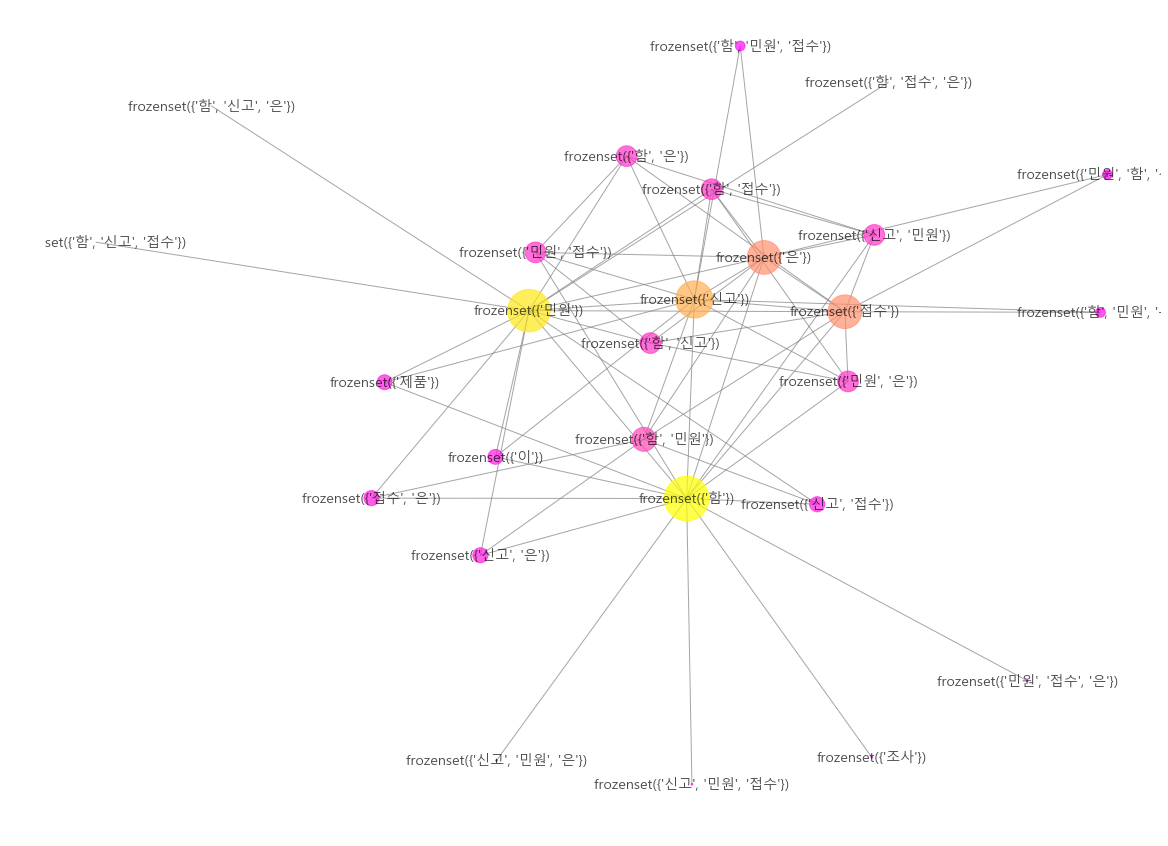

In [12]:
plt.figure(figsize=(20,15)); plt.axis('off')
nx.draw_networkx(G, font_family='Malgun Gothic', font_size =14,
                node_color=list(pr.values()),
                node_size=nsize, alpha= 0.7, edge_color ='.5',
                cmap='spring')
plt.savefig('../1399_output/nt.png', bbox_inches='tight')

Text(0.5, 1.0, 'fruchterman_reingold')

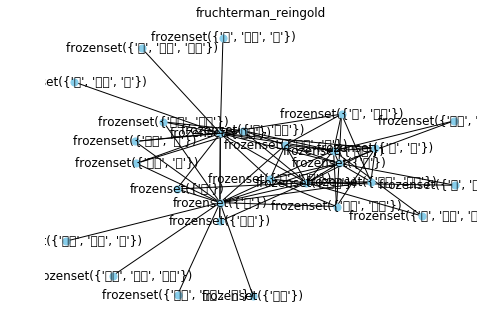

In [13]:
G=nx.from_pandas_edgelist(df, 'antecedents', 'consequents')
# Fruchterman Reingold
nx.draw(G, with_labels=True, node_size=50, node_color="skyblue", pos=nx.fruchterman_reingold_layout(G))
plt.title("fruchterman_reingold")
plt.show()

### http://blog.daum.net/geoscience/1408

In [ ]:
df= pd.read_excel('../1399_data/NewsResult_20101213-20200313.xlsx')
df['제목'].to_csv('../1399_data/bigkinds.txt', sep=' ', index=False)

f = open('../1399_data/bigkinds.txt', 'r', encoding='UTF-8')
lines = f.readlines()
f.close()
lines[0]

dataset = []
for i in range(len(lines)) :
    dataset.append(twitter.nouns(re.sub('[^가-힣a-zA-Z\s]', '', lines[i])))

In [ ]:
from apyori import apriori
result=(list(apriori(dataset, min_support=0.01)))

tf = pd.DataFrame(result)
tf['length'] = tf['items'].apply(lambda x: len(x))

tf = tf[(tf['length'] == 2) & (tf['support'] >= 0.01)].sort_values(by='support', ascending=False)
tf.head()

In [ ]:
G=nx.Graph()
ar=(tf['items']); G.add_edges_from(ar)

pr=nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize=2000*(nsize - min(nsize)) / (max(nsize) - min(nsize))

In [ ]:
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='Malgun Gothic', font_size =14,
                node_color=list(pr.values()),
                node_size=nsize, alpha= 0.7, edge_color ='.5',
                cmap='spring')
plt.savefig('../1399_output/nt.png', bbox_inches='tight')

# Networkx

In [198]:
# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
df

,from,to
0,A,D
1,B,A
2,C,E
3,A,C


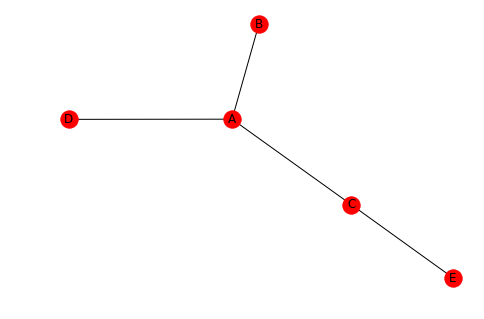

In [199]:
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()
 

In [93]:
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A','E','F','E','G','G','D','F'], 'to':['D', 'A', 'E','C','A','F','G','D','B','G','C']})
print(df)
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')

   from to
0     A  D
1     B  A
2     C  E
3     A  C
4     E  A
5     F  F
6     E  G
7     G  D
8     G  B
9     D  G
10    F  C


Text(0.5, 1.0, 'fruchterman_reingold')

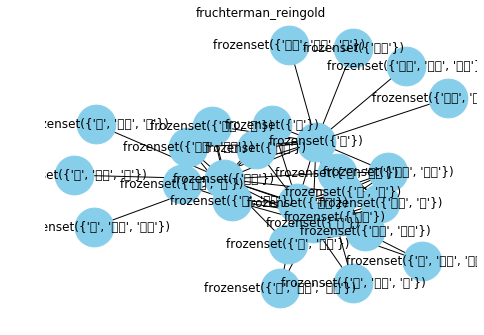

Text(0.5, 1.0, 'circular')

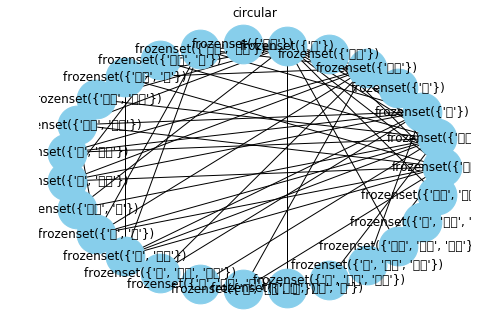

Text(0.5, 1.0, 'random')

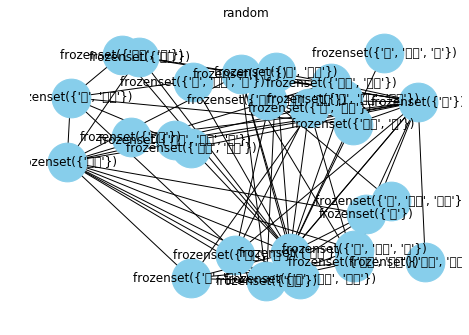

Text(0.5, 1.0, 'spectral')

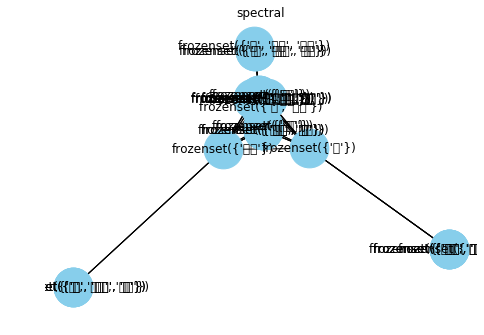

Text(0.5, 1.0, 'spring')

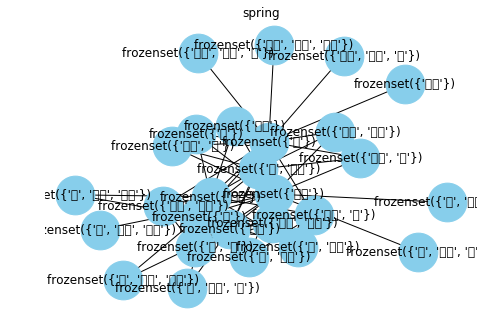

In [234]:
# Fruchterman Reingold
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.fruchterman_reingold_layout(G))
plt.title("fruchterman_reingold")
plt.show() 

# Circular
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.circular_layout(G))
plt.title("circular")
plt.show()

# Random
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.random_layout(G))
plt.title("random")
plt.show() 

# Spectral
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.spectral_layout(G))
plt.title("spectral")
plt.show() 

# Spring
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.spring_layout(G))
plt.title("spring")
plt.show()

# Direct & Undirect

,from,to
0,D,A
1,A,D
2,B,A
3,C,E
4,A,C


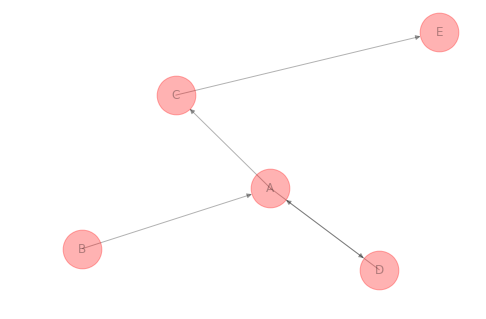

In [102]:
df = pd.DataFrame({ 'from':['D', 'A', 'B', 'C','A'], 'to':['A', 'D', 'A', 'E','C']})
df

# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())
 
# Make the graph
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)

Text(0.5, 1.0, 'UN-Directed')

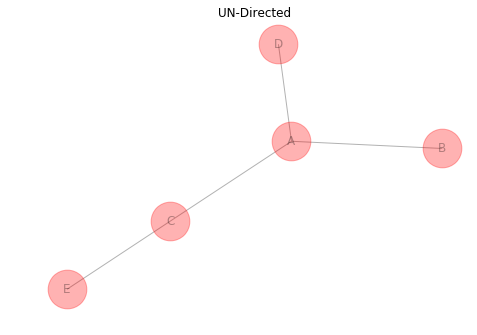

In [100]:
# Build your graph. Note that we use the Graph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# Make the graphnx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)

plt.title("UN-Directed")

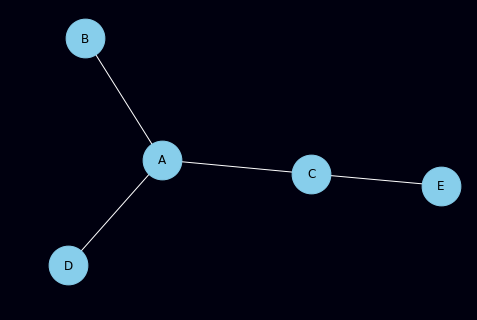

In [106]:
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# Custom the nodes:
fig = plt.figure()
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color='white')
fig.set_facecolor("#00000F")
 
# If you want to save the figure to png:
# plt.savefig('yourname.png', facecolor=fig.get_facecolor() )

In [129]:
df = pd.DataFrame({ 'from':['D', 'A', 'B', 'C','A'], 'to':['A', 'D', 'A', 'E','C']})
df['value'] = [1,3,6,5,11]
df

,from,to,value
0,D,A,1
1,A,D,3
2,B,A,6
3,C,E,5
4,A,C,11


In [ ]:
# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())
 
# Make the graph
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)

# correlation networks

In [157]:
df = pd.DataFrame(np.random.rand(100,50), columns = np.arange(0, 50))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.685184,0.654804,0.719067,0.540883,0.116992,0.058043,0.355876,0.163250,0.551333,0.955374,...,0.825340,0.795028,0.656805,0.269308,0.874416,0.560527,0.667948,0.394538,0.938792,0.873873
1,0.838440,0.690732,0.651002,0.979077,0.387724,0.472833,0.090203,0.768324,0.171027,0.609188,...,0.851492,0.891376,0.335839,0.009610,0.830793,0.908422,0.268775,0.937564,0.364834,0.877977
2,0.779945,0.970798,0.198473,0.862352,0.782125,0.015322,0.745978,0.228651,0.775763,0.392460,...,0.980191,0.056623,0.628362,0.351417,0.592493,0.780081,0.072140,0.998559,0.487215,0.639830
3,0.111268,0.518585,0.823685,0.179884,0.976633,0.223083,0.919012,0.345786,0.222152,0.619491,...,0.372477,0.970420,0.606842,0.248121,0.662299,0.969938,0.442593,0.507061,0.122023,0.610175
4,0.046417,0.720474,0.042097,0.074818,0.478252,0.949632,0.922796,0.269938,0.339084,0.306580,...,0.762944,0.663026,0.606790,0.325475,0.368346,0.249156,0.446962,0.547913,0.926597,0.778330


In [158]:
# Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
corr = df.corr()
corr.shape
corr.stack().reset_index().head()

(50, 50)

,level_0,level_1,0
0,0,0,1.000000
1,0,1,-0.001026
2,0,2,-0.036724
3,0,3,0.152765
4,0,4,0.023570


In [159]:
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links.shape
links.head()

(2500, 3)

,var1,var2,value
0,0,0,1.000000
1,0,1,-0.001026
2,0,2,-0.036724
3,0,3,0.152765
4,0,4,0.023570


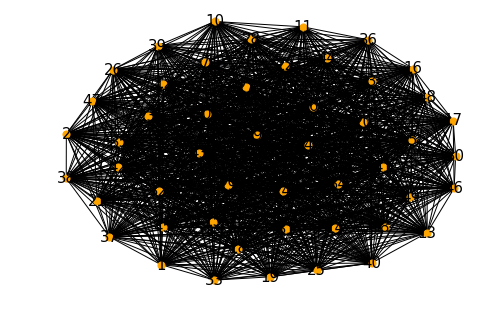

In [160]:
# Build your graph
G=nx.from_pandas_edgelist(links, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=50, edge_color='black', linewidths=1, font_size=15)

In [161]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.1) & (links['var1'] != links['var2']) ]
links_filtered.shape
links_filtered.head()

(414, 3)

,var1,var2,value
3,0,3,0.152765
12,0,12,0.154904
18,0,18,0.185714
19,0,19,0.227650
20,0,20,0.143516


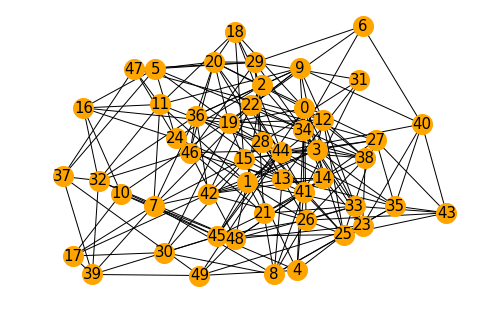

In [162]:
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)